## k-Means for Image Compression

The goal of this exercise is to use k-means clustering for image compression in Python.

##### a) Load an image of the famous painting "American Gothic" by Grand Wood, and store it as an RGB-image. 

In [3]:
# For easy image loading, we use skimage.io via io.imread(url)
#  You can get it via installing the scikit-image module/package
#  e.g. by executing this command from a cell -->   %pip install scikit-image

import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# load the image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg/895px-Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg"

# TODO: load image
img = io.imread(url)

# TODO: save it locally
io.imsave("image.jpg", img)

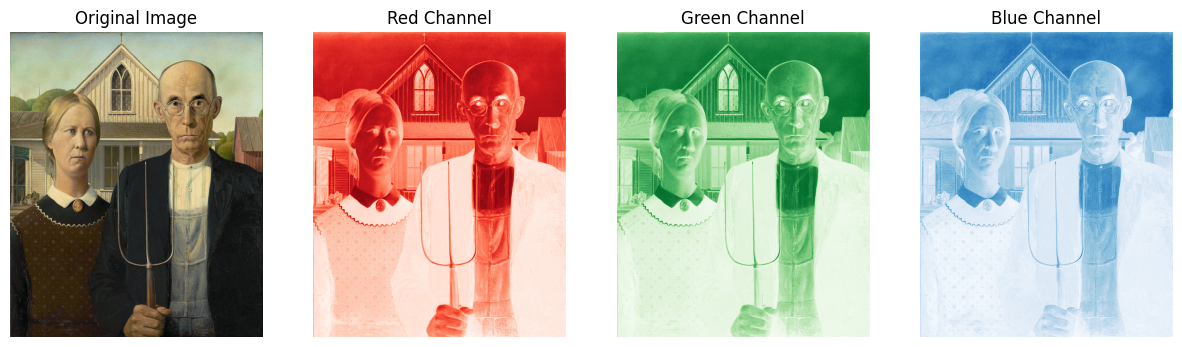

In [11]:
# TODO (optional): inspect the object you obtained from skimage.io.imread. Try to visualize
#  the color channels of the RGB image.

# Split the RGB channels
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Display each channel separately
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.show()

##### b) How many unique colors does the painting contain?

In [24]:
# TODO: Compute number of unique colors
unique_colors = np.unique(img.reshape(-1, 3), axis=0).shape[0]
print("Unique colors:", unique_colors)

Unique colors: 104858


##### c) Apply k-means clustering to compress the image. 

In [33]:
print(f"Original img dim: {img.shape}")
img_1d = img.reshape(-1, 3)
km = KMeans(n_clusters=5, init="random", max_iter=300)
km.fit(img_1d)
new_colors = km.cluster_centers_[km.predict(img_1d)]

Original img dim: (1080, 895, 3)


(-0.5, 894.5, 1079.5, -0.5)

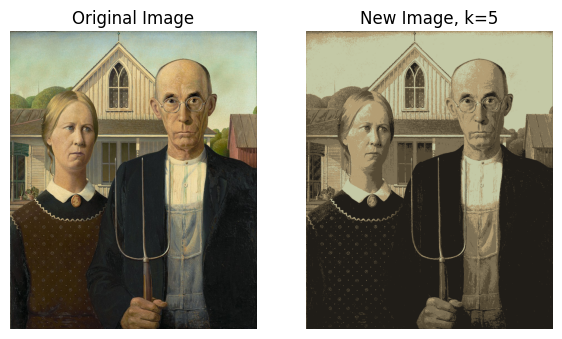

In [48]:
new_img = new_colors.reshape(1080, 895, 3)

plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_img.astype('uint8'))
plt.title("New Image, k=5")
plt.axis('off')

In [74]:
# TODO:
# Write a custom function to reuse for subsequent tasks. Ideally, let it return
#  the KMeans objects if needed (for subtask e) ).

def compress_image(image, number_of_clusters, keep_kmeans_objects=False):
  
    # TODO: Reshape image to color space (N*M x 3 matrix with values in [0, 1])
    img = image.reshape(-1, 3) / 255

    # TODO: Apply kmeans (create a KMeans object, fit data, get new colors, and
    #  reshape results into the old (N, M, 3) format
    km = KMeans(n_clusters=number_of_clusters, init="random", max_iter=300)
    compressed_img = km.fit_predict(img)
    new_colors = km.cluster_centers_[compressed_img]

    # The resulting values may fall out of range [0, 255], and need to be
    #  renormalized accordingly. 
    # TODO: Either recenter all valaues, or clip out of range values.
    compressed_image = (new_colors * 255).astype(np.uint8).reshape(image.shape)

    # Optionally, let the function also return the KMeans objects themselves.
    returns = None
    if keep_kmeans_objects:
        returns = compressed_image, km
    else:
        returns = compressed_image
    return returns

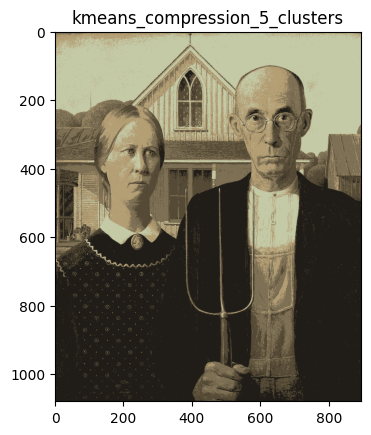

In [75]:
# Use the custom function to compress the original image using 5 clusters
cimg = compress_image(img, 5)
plt.title("kmeans_compression_5_clusters")
plt.imshow(cimg)

##### d) Apply k-means clustering for $k\in\{1, 2, 3, 5, 10, 15, 20\}$. Plot and save the compressed images of each iteration. If your computer is strong enough, try up to k=50. Observe the size of the image files. Looking at the images, at what point do you notice deminishing improvements in terms of image quality?

/var/folders/qh/mlzmqwtn0pb40276h37j_y000000gn/T/ipykernel_52137/4220590638.py:10: UserWarning: kmeans_compression_1.jpg is a low contrast image
  io.imsave(f"kmeans_compression_{k}.jpg", cimg)


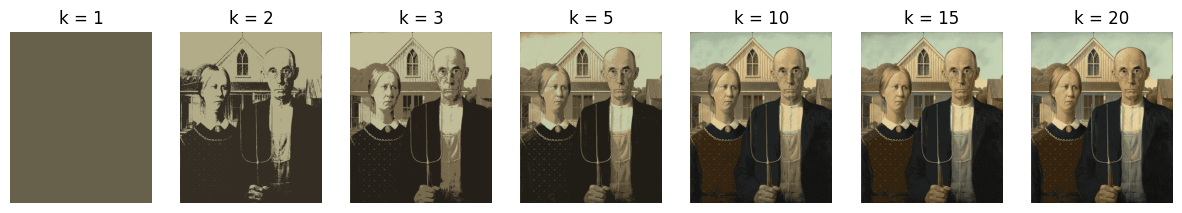

In [82]:
# TODO: loop your custom "compress_image" function for different k and save each
#  compressed image locally to compare file sizes.
plt.figure(figsize=(15, 4))

clusters = [1, 2, 3, 5, 10, 15, 20]
for i, k in enumerate(clusters):
    cimg = compress_image(img, k)
    
    # save image
    io.imsave(f"images/kmeans_compression_{k}.jpg", cimg)
    
    plt.subplot(1, len(clusters), i+1)
    plt.title(f"k = {k}")
    plt.imshow(cimg)
    plt.axis('off')

##### e) Determine a reasonable number of clusters using the "elbow criterion". For this purpose, plot the total within-cluster sum of squares (attribute "inertia_" of the "KMeans" object) against the number of clusters, e.g. for $k\in[1, 10]$. Does the "elbow point" correspond to your visual impression in part d)?

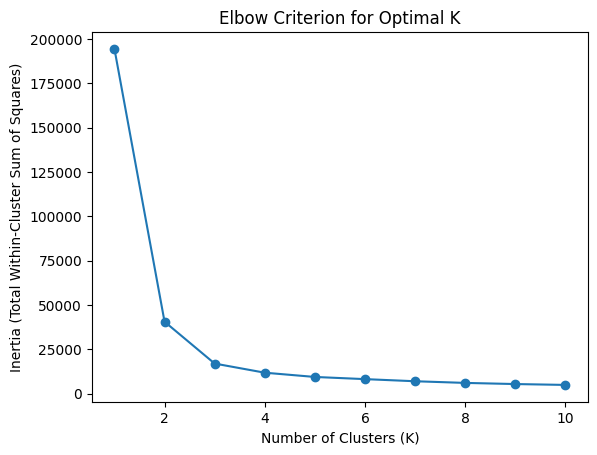

In [85]:
# TODO: for k in [1, ..., 10], plot the corresponding inertia_ of the KMeans
#  (use the keep_kmeans_objects=True functionality of the compress_image function)
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    compressed_image, kmeans_object = compress_image(img, k, keep_kmeans_objects=True)
    inertia_values.append(kmeans_object.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Criterion for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Total Within-Cluster Sum of Squares)')
plt.show()